In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [80]:
df = pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


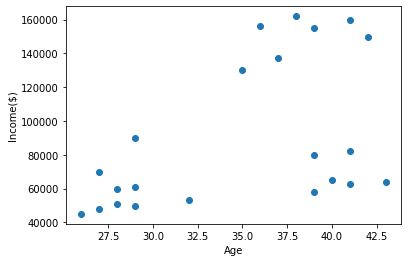

In [81]:
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.scatter(df.Age, df['Income($)'])

In [82]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [83]:
km_npp=KMeans(n_clusters=3)
pred_npp = km_npp.fit_predict(df[['Age','Income($)']])
pred_npp

array([0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2])

In [84]:
cent_npp = km_npp.cluster_centers_
cent_npp

array([[3.40000000e+01, 8.05000000e+04],
       [3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04]])

In [85]:
df['pred_npp']=pred_npp
df.head()

,Name,Age,Income($),pred_npp
0,Rob,27,70000,0
1,Michael,29,90000,0
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,1


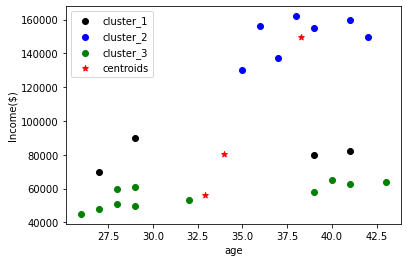

In [86]:
plt.xlabel('age')
plt.ylabel('Income($)')
plt.scatter(df[df.pred_npp==0].Age,df[df.pred_npp==0]['Income($)'], color='black')
plt.scatter(df[df.pred_npp==1].Age,df[df.pred_npp==1]['Income($)'], color='blue')
plt.scatter(df[df.pred_npp==2].Age,df[df.pred_npp==2]['Income($)'], color='green')
plt.scatter(cent_npp[:,0],cent_npp[:,1],color='red', marker='*')
plt.legend(['cluster_1', 'cluster_2','cluster_3','centroids'])

We are getting these ranodm Clusters because the range of our two data columns, are very different, the income has a very wide range, wheras the age is a small window. </br>
So, first we'll scale the age and income data between 0 to 1 using MinMaxScaler(), them we will apply the k-means algorithm again

In [87]:
scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df.Age = scaler.fit_transform(df[['Age']])

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.fit_transform(df[['Income($)']])
df.head()

,Name,Age,Income($),pred_npp
0,Rob,0.058824,0.213675,0
1,Michael,0.176471,0.384615,0
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,1


In [88]:
km = KMeans(n_clusters=3)
pred = km.fit_predict(df[['Age','Income($)']])
pred

array([2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1])

In [89]:
cent = km.cluster_centers_
cent

array([[0.72268908, 0.8974359 ],
       [0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428]])

In [90]:
df.drop('pred_npp', axis='columns', inplace=True)
df['pred']=pred
df.head()

,Name,Age,Income($),pred
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0


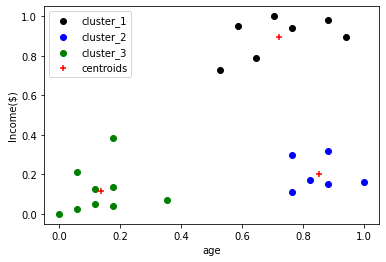

In [92]:
plt.xlabel('age')
plt.ylabel('Income($)')
plt.scatter(df[df.pred==0].Age,df[df.pred==0]['Income($)'], color='black')
plt.scatter(df[df.pred==1].Age,df[df.pred==1]['Income($)'], color='blue')
plt.scatter(df[df.pred==2].Age,df[df.pred==2]['Income($)'], color='green')
plt.scatter(cent[:,0],cent[:,1],color='red', marker='+')
plt.legend(['cluster_1', 'cluster_2','cluster_3','centroids'])

Since we had a guess from the plot that there are three clusters, But if we have a larger data set then we need to find out the best value of K for the no. of clusters, It can be find by ploting an error vs. k graph

In [93]:
sse = []
for k in range (1,16):
    km = KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [99]:
sse

[5.434011511988178,
 2.0911363886990775,
 0.4750783498553096,
 0.34910470944195654,
 0.2621792762345213,
 0.22020960864009398,
 0.16869711728567788,
 0.13265419827245162,
 0.10188787724979426,
 0.08139933135681814,
 0.061533596714222503,
 0.04681168434939175,
 0.03913672635392093,
 0.030426552928992826,
 0.02336003499387405]

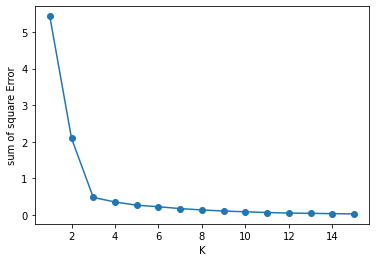

In [101]:
plt.xlabel('K')
plt.ylabel('sum of square Error')
plt.Figure(figsize=(10,8))
plt.scatter(range(1,16),sse)
plt.plot(range(1,16),sse)